In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras import layers


import numpy as np
import tensorflow as tf

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/[Data2]drug_absorbance.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/[Data2]diabetes.csv')

## 1. Implementation of linear regression using keras

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


150/150 [==============================] - 1s 4ms/step - loss: 19965.8789 - mse: 19965.8789 - val_loss: 2678.5742 - val_mse: 2678.5742
Epoch 2/20
150/150 [==============================] - 0s 3ms/step - loss: 871.8190 - mse: 871.8190 - val_loss: 131.4646 - val_mse: 131.4646
Epoch 3/20
150/150 [==============================] - 0s 3ms/step - loss: 56.3121 - mse: 56.3121 - val_loss: 23.5126 - val_mse: 23.5126
Epoch 4/20
150/150 [==============================] - 0s 3ms/step - loss: 21.2372 - mse: 21.2372 - val_loss: 19.2484 - val_mse: 19.2484
Epoch 5/20
150/150 [==============================] - 0s 3ms/step - loss: 19.7430 - mse: 19.7430 - val_loss: 19.1842 - val_mse: 19.1842
Epoch 6/20
150/150 [==============================] - 0s 3ms/step - loss: 19.6906 - mse: 19.6906 - val_loss: 19.2100 - val_mse: 19.2100
Epoch 7/20
150/150 [==============================] - 0s 2ms/step - loss: 19.6861 - mse: 19.6861 - val_loss: 19.1900 - val_mse: 19.1900
Epoch 8/20
150/150 [=========================

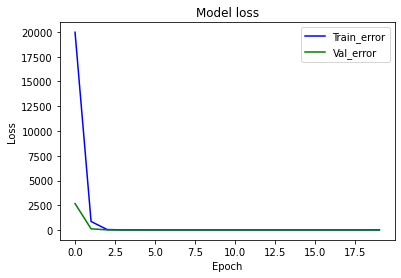

400/400 [==============================] - 1s 2ms/step - loss: 17.7935 - mse: 17.7935


In [62]:
data = df.values
x = data[:,0:1]
y = data[:,1:]

# 1. 데이터 파티셔닝
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,random_state=7462, shuffle=True)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5,random_state=7462, shuffle=True)

# 2. 모델구성
model = Sequential()
model.add(Dense(1, input_dim = 1))

# 3. 모델피팅
sgd=optimizers.SGD(lr=0.000005)
model.compile(loss='mse', optimizer=sgd, metrics=['mse'])
hist = model.fit(x_train, y_train, epochs=20, batch_size=8, validation_data=(x_valid,y_valid))

# 4. 모델 손실 함수 시각화
plt.plot(hist.history['loss'], 'b-', label='Train_error')
plt.plot(hist.history['val_loss'], 'g-', label='Val_error')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 5. 모델 평가
loss = model.evaluate(x_test, y_test, batch_size=1)


## 2. Implementation of logistic regression using keras

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


240/240 [==============================] - 1s 3ms/step - loss: 4.6966 - accuracy: 0.1557 - val_loss: 2.7004 - val_accuracy: 0.1156
Epoch 2/10
240/240 [==============================] - 1s 2ms/step - loss: 2.0168 - accuracy: 0.2896 - val_loss: 1.4312 - val_accuracy: 0.4828
Epoch 3/10
240/240 [==============================] - 0s 2ms/step - loss: 0.9658 - accuracy: 0.5016 - val_loss: 0.8398 - val_accuracy: 0.6500
Epoch 4/10
240/240 [==============================] - 1s 2ms/step - loss: 0.4883 - accuracy: 0.7646 - val_loss: 0.3284 - val_accuracy: 0.9094
Epoch 5/10
240/240 [==============================] - 0s 2ms/step - loss: 0.3257 - accuracy: 0.8875 - val_loss: 0.2485 - val_accuracy: 0.9453
Epoch 6/10
240/240 [==============================] - 0s 2ms/step - loss: 0.2574 - accuracy: 0.9281 - val_loss: 0.2165 - val_accuracy: 0.9469
Epoch 7/10
240/240 [==============================] - 1s 2ms/step - loss: 0.2221 - accuracy: 0.9427 - val_loss: 0.1868 - val_accuracy: 0.9578
Epoch 8/10
240/24

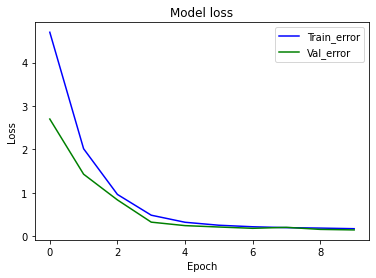

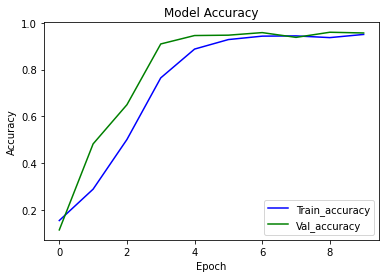

640/640 [==============================] - 1s 2ms/step - loss: 0.1724 - accuracy: 0.9453


In [67]:
# 1. 데이터 파티셔닝
data_set=df2.values
x = data_set[:,0:3]
y = data_set[:,3]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=66, test_size=0.4)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, random_state=66, test_size=0.5)

 
# 2. 모델구성
model = Sequential()
model.add(Dense(1, input_dim = 3, activation='sigmoid'))

# 3. 모델피팅
sgd=optimizers.SGD(lr=0.0005)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
hist2 = model.fit(x_train, y_train, epochs=10, batch_size=8, validation_data=(x_val,y_val))

# 4. 모델 손실 함수 시각화
plt.plot(hist2.history['loss'], 'b-', label='Train_error')
plt.plot(hist2.history['val_loss'], 'g-', label='Val_error')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 5. 모델 정확도 시각화
plt.plot(hist2.history['accuracy'], 'b-', label='Train_accuracy')
plt.plot(hist2.history['val_accuracy'], 'g-', label='Val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 5. 모델 평가
loss = model.evaluate(x_test, y_test, batch_size=1)